In [2]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# 設定 Mac 中文字體和解析度
plt.rcParams['font.sans-serif'] = ['PingFang TC', 'Arial Unicode MS']  # 黑體-繁體
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 125  
plt.rcParams['savefig.dpi'] = 150

In [4]:
# 設定檔案路徑(相對路徑)
file_path = os.path.join('data', 'tracks_features.csv')
df = pd.read_csv(file_path)
# 顯示基本資訊
print(f"總共有 {df.shape[0]:,} 筆資料，{df.shape[1]} 個欄位。")
display(df.head())

總共有 1,204,025 筆資料，24 個欄位。


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [ ]:
import pandas as pd

def generate_codebook(df):
    # 1. 建立基礎資訊表 (欄位名稱、型態、非空值數量)
    codebook = pd.DataFrame({
        '欄位名稱': df.columns,
        '資料型態': df.dtypes.astype(str),
        '非空值筆數': df.count().values,
        '缺失值筆數': df.isnull().sum().values,
        '唯一值數量 (Unique)': df.nunique().values
    })
    
    codebook = codebook.set_index('欄位名稱')
    stats = df.describe().transpose()
    codebook = codebook.join(stats[['mean', 'std', 'min', '50%', 'max']], how='left')
    codebook.rename(columns={
        'mean': '平均值',
        'std': '標準差', 
        'min': '最小值', 
        '50%': '中位數', 
        'max': '最大值'
    }, inplace=True)

    return codebook


df_codebook = generate_codebook(df)
display(df_codebook)

,資料型態,非空值筆數,缺失值筆數,唯一值數量 (Unique),平均值,標準差,最小值,中位數,最大值
欄位名稱,,,,,,,,,
id,object,1204025,0,1204025,NaN,NaN,NaN,NaN,NaN
name,object,1204022,3,850943,NaN,NaN,NaN,NaN,NaN
album,object,1204014,11,106161,NaN,NaN,NaN,NaN,NaN
album_id,object,1204025,0,118382,NaN,NaN,NaN,NaN,NaN
artists,object,1204025,0,165365,NaN,NaN,NaN,NaN,NaN
artist_ids,object,1204025,0,166423,NaN,NaN,NaN,NaN,NaN
track_number,int64,1204025,0,50,7.656352,5.994977,1.0,7.00000,50.000
disc_number,int64,1204025,0,13,1.055906,0.295375,1.0,1.00000,13.000
explicit,bool,1204025,0,2,NaN,NaN,NaN,NaN,NaN


EDA 問題紀錄

**Tempo (BPM)**
- 問題：數值為 `0` 代表演算法無法偵測節拍（如純噪音或無聲），會嚴重影響標準化 (StandardScaler) 的平均值與分布。
- 處理：刪除 `tempo == 0` 的資料。

**Time_signature (拍號)**
- 問題：拍號不可能為 `0`。
- 處理：刪除 `time_signature == 0` 的資料。

**Year (年份)**
- 問題：最小值為 `0` 明顯屬資料建檔錯誤，會干擾時間序列分析與圖表呈現。
- 處理：刪除 `year < 1900` 的資料。

**Duration_ms (長度)**
- 問題：最小值 `1000` (1秒) 極可能為測試音效而非完整歌曲。
- 處理：刪除 `duration_ms < 30000` (小於 30 秒) 的資料。

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 定義特徵欄位
feature_cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

# 2. 設定EDA發現不合理欄位的數值過濾條件
mask = (df['tempo'] > 0) & \
       (df['duration_ms'] > 30000) & \
       (df['year'] >= 1900) & \
       (df['time_signature'] > 0)

# 3. 執行過濾
df_clean = df[mask].copy()

# 4. 輸出清洗統計
removed_count = len(df) - len(df_clean)
print(f"清洗前筆數：{len(df)}")
print(f"清洗後筆數：{len(df_clean)}")
print(f"移除筆數：{removed_count}")

# 5. 更新特徵矩陣與標準化
X = df_clean[feature_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

清洗前筆數：1204025
清洗後筆數：1195666
移除筆數：8359


**下方 EDA 會按找以下的步驟來分析特徵變數的狀況**
1. 單變數: 跑直方圖跟密度圖（Kernel Density Estimation, KDE），檢查偏態、單峰還是多峰狀況
2. 雙變數: 跑熱力圖（相關分析矩陣），變數之間的共線性。note：K-Means 計算的是「歐幾里得距離」，如果兩個特徵高度相關（例如 0.9），在數學上提供的資訊就會是是重複的。這會導致其他可能有價值的特徵被稀釋掉，這是不樂見的。
3. 透過箱型圖檢查離群值。


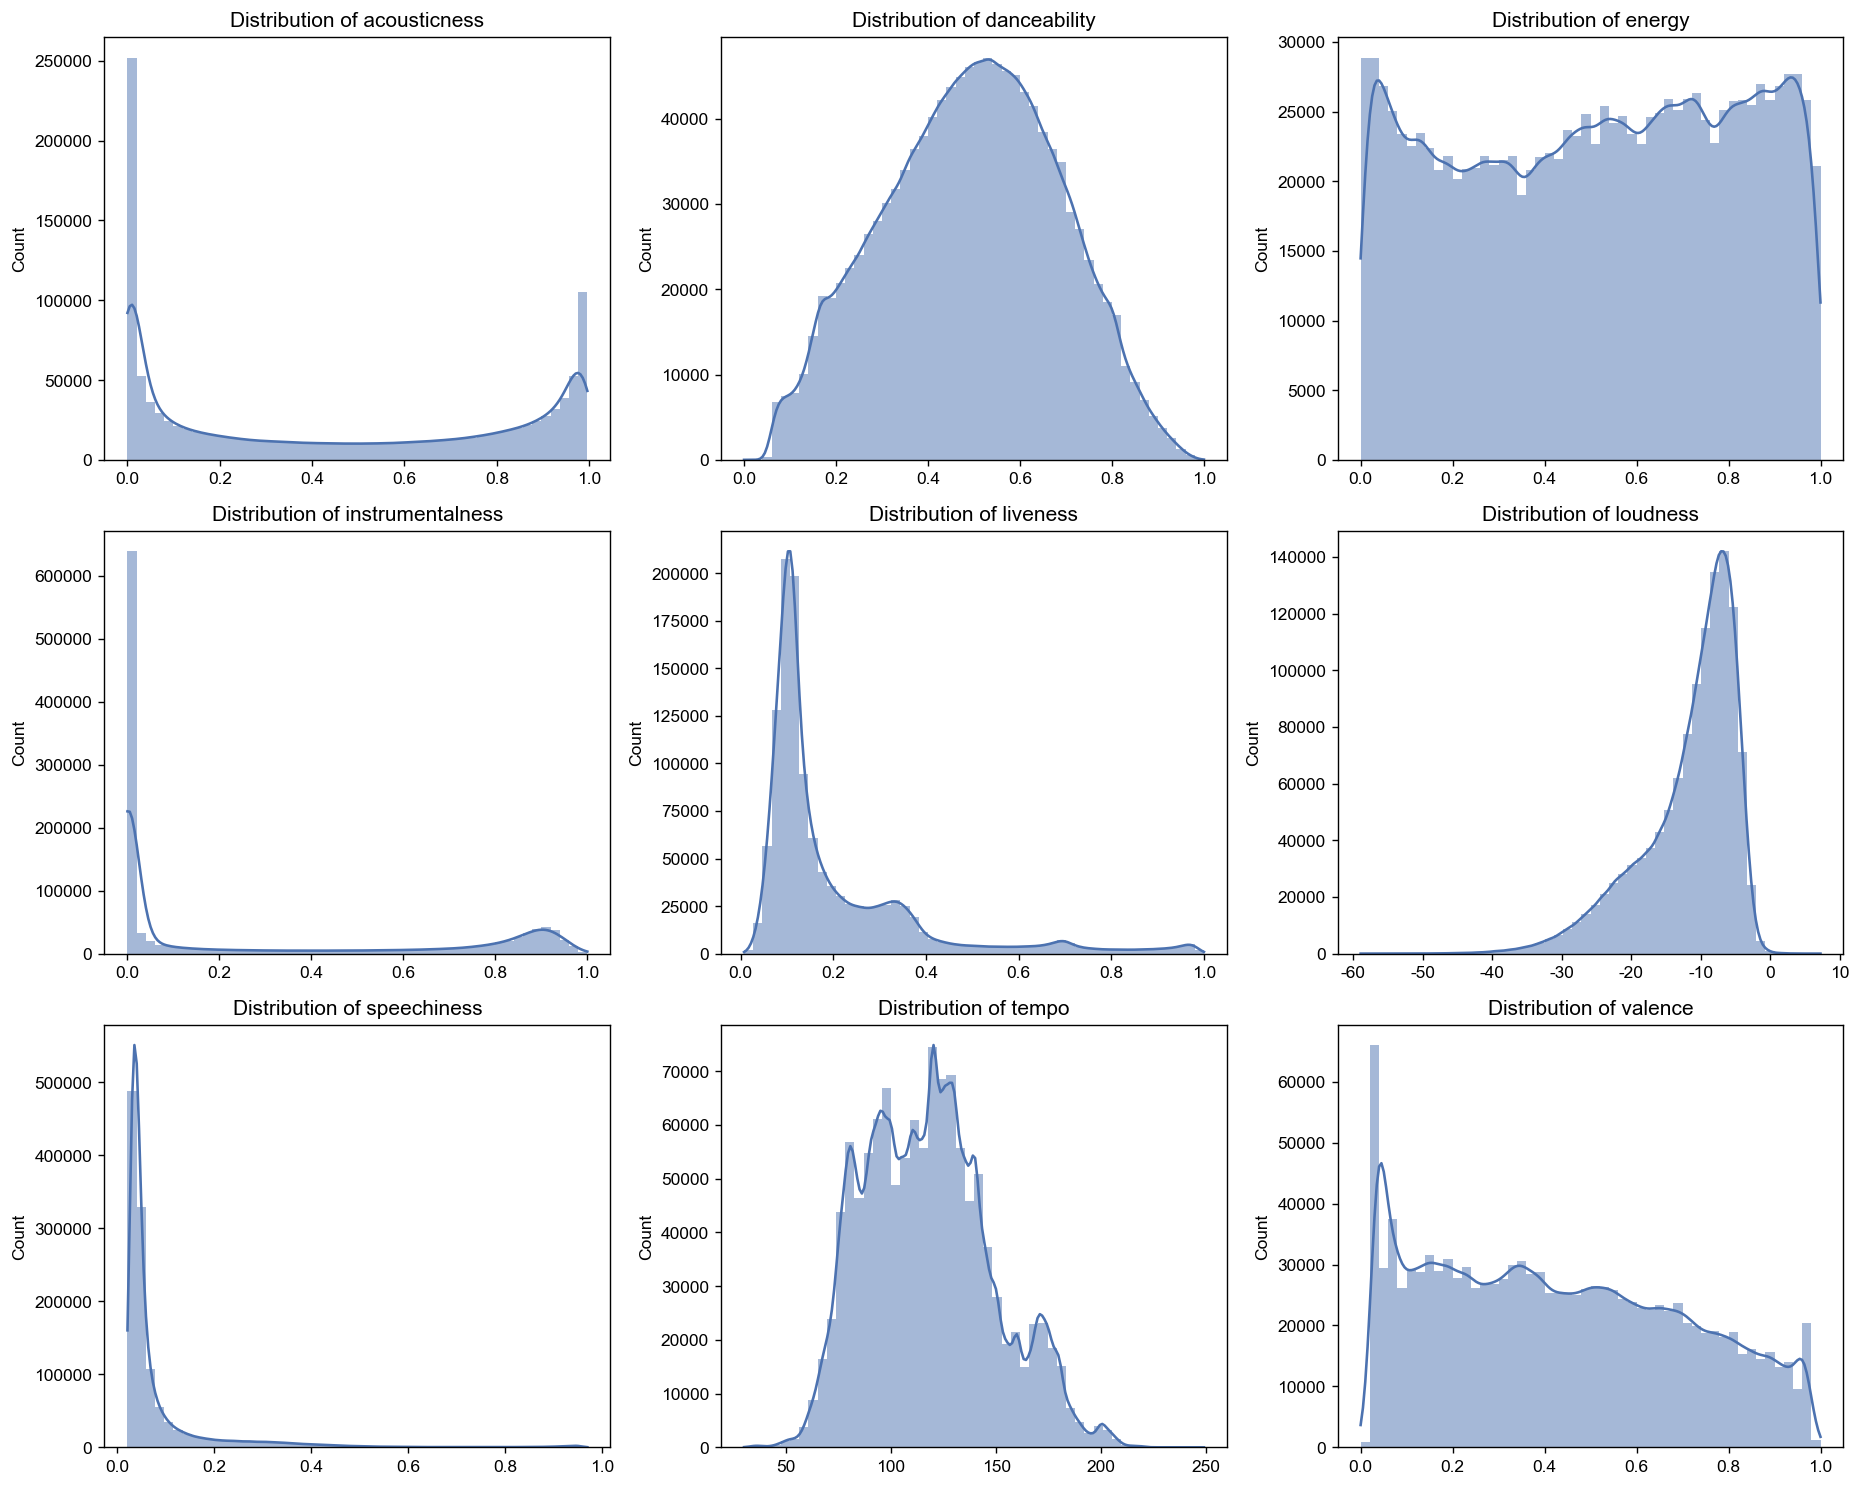

In [11]:
# 設定畫布大小
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# 針對每個數值特徵繪製分佈圖
for i, col in enumerate(feature_cols):
    # 使用 histplot 同時繪製直方圖與 KDE 曲線
    # 使用 df_clean (原始尺度) 以保留物理意義 (如 BPM)
    sns.histplot(df_clean[col], bins=50, kde=True, ax=axes[i], color='#4c72b0', edgecolor=None)
    
    # 圖表美化
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**根據上圖可以發現**

**Speechiness**
- 問題：呈極度右偏 。絕大多數數據集中在 0 附近（純音樂），只有極少數在右側長尾（Rap、Podcast）。這種「長尾」會讓 K-Means 的中心點被拉向少數的極端值，導致大部分正常音樂區分度降低。
- 處理：取 log 或標準化

**Instrumentalness**
- 問題：雙極化 (Bimodal) 且極度右偏。
- 處理：因為二元性質所以不用log，而是透過標準化確保 0 與 1 的距離與其他特徵的距離權重相當。

**Liveness**
- 問題：右偏 (Right-Skewed)。大部分是錄音室作品（數值低），少數是現場錄音（數值高）。
- 處理：用 Log Transform，拉開低數值區域的差異，讓模型更容易區分「完全沒現場感」跟「有一點現場感」的差別。

**Loudness**
- 問題：數值為負且有些微左偏。K-Means 的距離公式（歐幾里得距離），計算負數平方雖然沒問題，但負數在解釋上較不直觀，且與其他 0~1 的特徵尺度差異過大
- 處理：透過標準化將負數轉為以 0 為中心的 Z-Score，解決單位與負數問題

**Acousticness**
- 問題：呈現 雙峰 (Bimodal) 分佈（U型）。這不是壞事，這代表資料天生就適合分群。
- 處理：不需要轉換，直接標準化即可。

------

**note: Log vs Box-Cox 轉換該怎麼選？**
1. 先看最小值，如果有 0 或負數，Log 和 Box-Cox 都不能直接用。必須先做 $x = x - \min(x) + 1$ 的平移。
2. 再看偏態程度：可以用 df.skew() 計算。如果偏態係數 > 1 (嚴重右偏)：Log 通常夠用。如果偏態係數在 0.5 ~ 1 之間 (輕微偏斜)：Box-Cox 會調得比較漂亮。

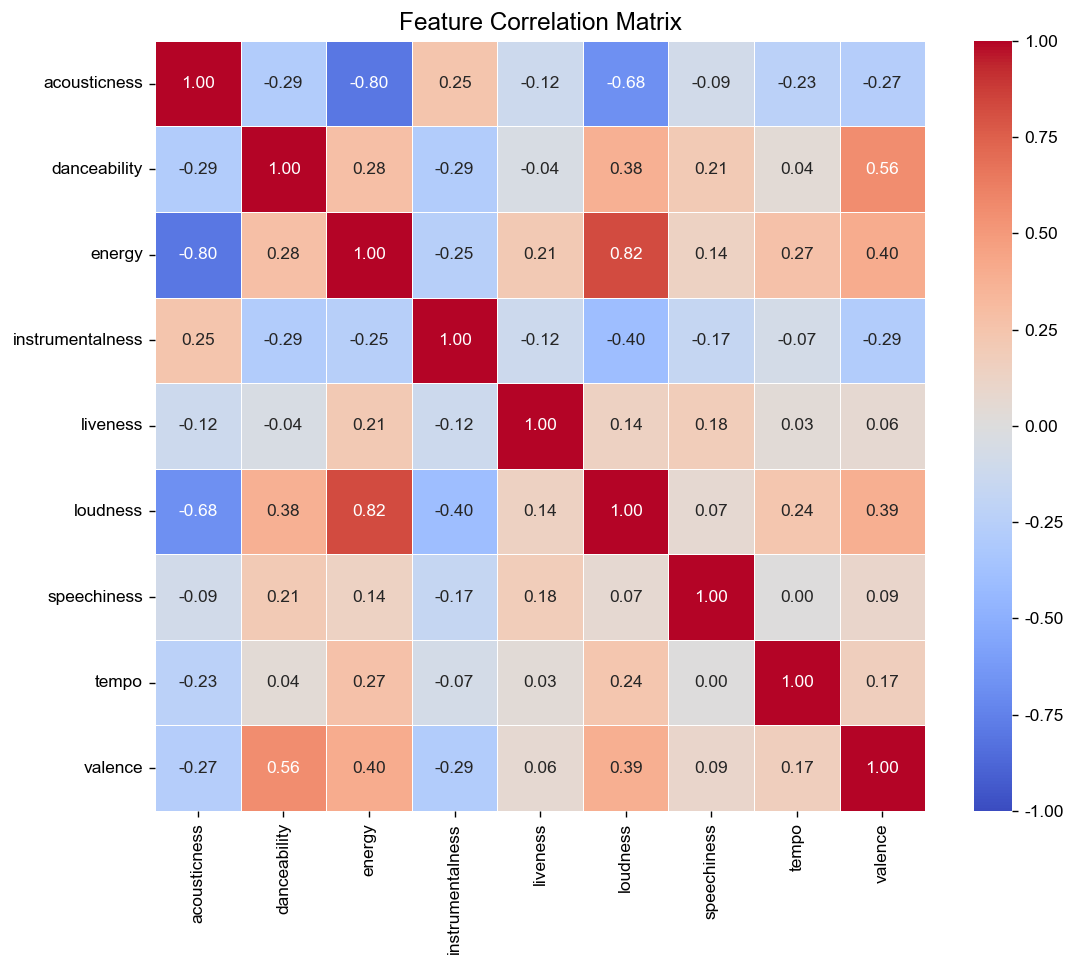

In [8]:
# 計算皮爾森相關係數矩陣
corr_matrix = df_clean[feature_cols].corr()

plt.figure(figsize=(10, 8))

# 繪製熱力圖
sns.heatmap(corr_matrix, 
            annot=True,       # 顯示相關係數數值
            fmt=".2f",        # 數值格式
            cmap='coolwarm',  # 冷暖色調區分正負相關
            vmin=-1, vmax=1,  # 固定數值範圍
            square=True,      # 保持單元格為正方形
            linewidths=0.5)   # 格線寬度

plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

**雙變數相關分析（熱力圖）**

**Energy vs. Loudness**

- **現象**：呈現 **高度正相關**（係數通常 $> 0.75$）。顏色呈現深紅色。
- **問題**：資訊高度重疊（大聲的歌通常能量都很強）。K-Means 會變相將「強度/音量」這個概念的權重加倍 (Double Counting)，導致分群結果過度依賴音量，掩蓋了其他特徵（如節奏、情緒）的影響力。
- **處理**：**二選一** 保留 Energy。

**Acousticness vs. Energy**

- **現象**：呈現 **高度負相關**（係數通常 $< -0.7$）。顏色呈現深藍色。
- **問題**：資訊互斥。原聲樂器（木吉他、鋼琴）通常能量較低，電子合成器能量較高。這在向量空間中會形成一條明顯的線性軌跡，雖不至於破壞模型，但提供了重複的「動/靜」資訊。
- **處理**：可保留，但若模型維度太高想瘦身，是可以考慮移除的候選。

**Valence vs. Danceability**

- **現象**：呈現 **中度正相關**（係數約 $0.5$ 左右）。
- **問題**：開心的歌通常比較好跳舞，但相關性未達危險門檻·（$< 0.7$）。
- **處理**：**保留**。這兩個特徵各自保有獨特性（有些歌很悲傷但節奏感強，適合跳舞），對分群有幫助。

**Other Features (其他特徵)**

- **現象**：相關係數普遍落在 $-0.3 \sim 0.3$ 之間（顏色淺）。
- **問題**：無顯著共線性。
- **處理**：**全保留**

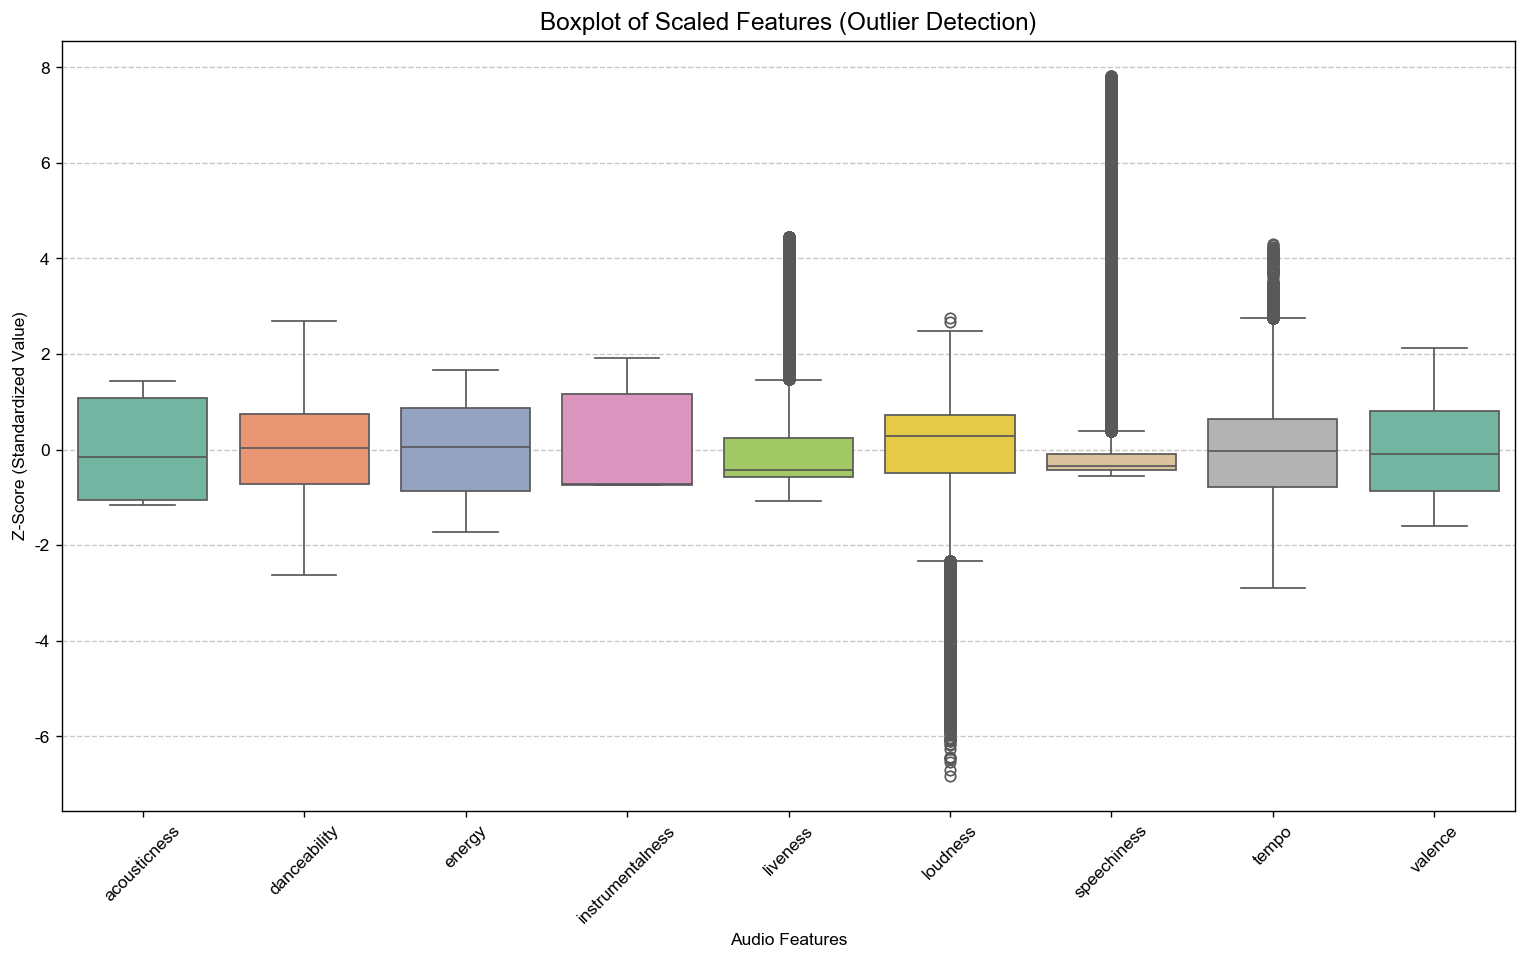

In [12]:
plt.figure(figsize=(15, 8))

# 使用標準化後的數據繪製箱型圖，以便在同一尺度下比較
sns.boxplot(data=X_scaled_df, palette="Set2")

plt.title('Boxplot of Scaled Features (Outlier Detection)', fontsize=14)
plt.xlabel('Audio Features')
plt.ylabel('Z-Score (Standardized Value)')
plt.xticks(rotation=45) # 旋轉標籤以免重疊
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**1. Speechiness (語言感)**
- 現象：箱型圖被壓得很扁，上方有大量密集離群點（數值 $> 0.6$）。直方圖顯示極度右偏。
- 問題：
    - 統計上：典型的長尾分佈，標準差被少數極端值拉大。
    - domain 分析：這些高數值代表 Rap (饒舌)、Spoken Word (朗誦) 或 Podcast。若直接刪除，模型將無法辨識這些重要曲風。
- 修正處理：保留資料，改用 Log Transform (對數轉換)。
- 理由：取 Log 可以拉開低數值區間（純音樂 vs 有點人聲）的差異，同時壓縮高數值區間（Rap vs Podcast），讓分佈接近常態，模型就能合理處理這些資料。

**2. Loudness (響度)**
- 現象：離群點主要集中在下方（數值極低，如 $-40\text{dB} \sim -60\text{dB}$）。
- 問題：
    - 統計上：極小值拉低了平均數。
    - domain 分析：這些代表 古典樂、環境音樂 或 動態範圍極大 的作品。
    - 演算法風險：K-Means 使用歐幾里得距離，$-60\text{dB}$ 與 $-5\text{dB}$ 的巨大數值差距會主導距離計算，掩蓋其他特徵。
- 修正處理：保留資料，改用標準化 (Standardization)。
- 理由：我們需要保留「這首歌很安靜」的資訊。透過標準化將其轉為 Z-Score，就能在不刪除資料的情況下，將其數值範圍縮放到與其他特徵一致（如 $-3 \sim +3$），避免尺度災難。

**3. Liveness (現場感)**
- 現象：右偏分佈，離群點代表現場錄音 (Live) 版本。
- 問題：大部分歌曲是錄音室版本（數值低），少數現場版數值高。
- 修正處理：保留資料，改用 Log Transform (對數轉換)。
- 理由：與 Speechiness 類似，透過 Log 轉換修正偏態，讓模型能區分「錄音室」與「現場」的差異，而不被極端值干擾。

**4. Instrumentalness (器樂感)**
- 現象：雙極化分佈（$0$ 或 $1$），中間幾乎真空。
- 問題：這是一個二元性質強烈的特徵（有人聲 vs 純音樂）。
- 修正處理：完全保留，直接標準化。
- 理由：這不是偏態，而是特徵本質。不需要 Log，只要標準化讓其權重與其他特徵相當即可。

**5. Danceability, Valence, Tempo**
- 現象：分佈健康，接近常態，無明顯離群值。
- 處理：完全保留，直接標準化。